# K-Means Clustering

## Importing the dataset

In [1]:
import pandas as pd
dataset = pd.read_csv('data.csv')

In [2]:
dataset.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [3]:
# Note: It is advisable to normalize the data if the features are not on the same scale.
# To normalize the data, you can use the `StandardScaler` from the `sklearn.preprocessing` library.
# This will ensure that each feature has a mean of 0 and a standard deviation of 1.
# Here's how you can do it:

# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_normalized = scaler.fit_transform(X)

# Now, X_normalized can be used for clustering instead of X.


In [3]:
X = dataset.iloc[:,:]

In [4]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


## Using the elbow method to find the optimal number of clusters

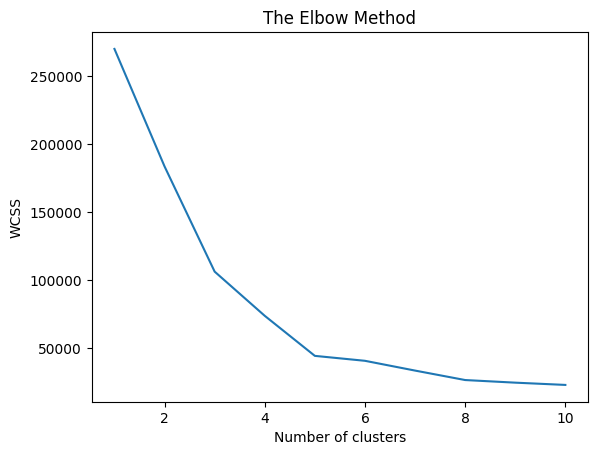

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset

In [7]:
kmeans = KMeans(n_clusters = 5, init="k-means++", random_state = 42)
y_pred = kmeans.fit_predict(X)

In [8]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [9]:
y_pred

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

## Visualising the clusters

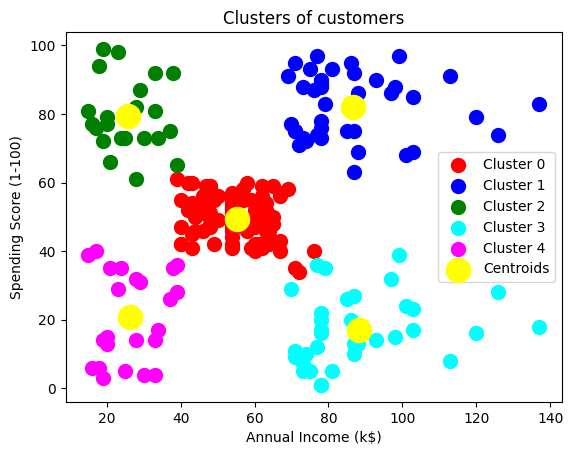

In [10]:
plt.scatter(X.iloc[y_pred == 0, 0], X.iloc[y_pred == 0, 1], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(X.iloc[y_pred == 1, 0], X.iloc[y_pred == 1, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X.iloc[y_pred == 2, 0], X.iloc[y_pred == 2, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(X.iloc[y_pred == 3, 0], X.iloc[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.scatter(X.iloc[y_pred == 4, 0], X.iloc[y_pred == 4, 1], s = 100, c = 'magenta', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()